# DS 4400 - Spring 2023
### Classifying Acute Forms of Leukemia using Gene Expression Data
##### Amanda Bell, Timothy Wang, Jasmine Wong

# Data Collection

In [ ]:
import pandas as pd
train_data_url = "https://raw.githubusercontent.com/timaeusx/ds4400-gene-expression/main/data/data_set_ALL_AML_train.csv"
test_data_url = "https://raw.githubusercontent.com/timaeusx/ds4400-gene-expression/main/data/data_set_ALL_AML_independent.csv"
labels_url = "https://raw.githubusercontent.com/timaeusx/ds4400-gene-expression/main/data/actual.csv"

df_train = pd.read_csv(train_data_url)
df_test = pd.read_csv(test_data_url)
df_labels = pd.read_csv(labels_url)

In [ ]:
df_train

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,279,A,737,A,588,A,1170,A,2315,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,51,A,227,A,361,A,284,A,250,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,6,A,-9,A,-26,A,39,A,-12,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,2484,P,371,A,133,A,298,A,790,P


In [ ]:
df_test

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,1074,A,67,A,893,P,722,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,475,A,263,A,297,A,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,48,A,-33,A,6,A,0,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,168,A,-33,A,1971,P,510,P,...,260,A,1777,P,210,A,284,A,379,A


In [ ]:
df_labels

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL
...,...,...
67,68,ALL
68,69,ALL
69,70,ALL
70,71,ALL


# Data Preprocessing

In [ ]:
# get data into a form where features are columns, then get just the values, then get just the calls
def process_features(df):
  features = df.transpose()
  features.columns = features.iloc[0]
  features = features[2:]
  values = features.drop(index=features.index[1::2])
  calls = features.drop(index=features.index[::2])
  return(features, values, calls)

In [ ]:
train_features, x_train, train_calls = process_features(df_train)
test_features, x_test, test_calls = process_features(df_test)

In [ ]:
# make sure index column of training and testing data are numeric so they can be sorted correctly by patient number
x_train.index = pd.to_numeric(x_train.index)
x_train.sort_index(inplace = True)
x_test.index = pd.to_numeric(x_test.index)
x_test.sort_index(inplace = True)

In [ ]:
# Convert labels to binary classification problem where True is for ALL, False  is for AML
y_train = df_labels.iloc[0:38]["cancer"]
y_train = [y == "ALL" for y in y_train]
y_test = df_labels.iloc[38:]["cancer"]
y_test = [y == "ALL" for y in y_test]

# Exploratory Data Analysis

In [ ]:
# Rebuild Df
X = pd.concat([x_train, x_test])
y = y_train + y_test
X

Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products},HMG2 High-mobility group (nonhistone chromosomal) protein 2,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7)
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-154,-136,49,180,-257,-273,141,-123,52,878,...,214,540,13,1075,-45,524,249,40,-68,-1
69,-79,-118,-30,68,-110,-264,-28,-61,40,-217,...,409,617,-34,738,11,742,234,72,109,-30
70,-55,-44,12,129,-108,-301,-222,-133,136,320,...,131,318,35,241,-66,320,174,-4,176,40
71,-59,-114,23,146,-171,-227,-73,-126,-6,149,...,214,760,-38,201,-55,348,208,0,74,-12


In [ ]:
# Look at number of features and samples we're dealing with
print(X.shape[0], "samples", X.shape[1], "number of features")
print(len(y), "samples")

72 samples 7129 number of features
72 samples


In [ ]:
print(y)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, True, True, True, True, True]


Text(0.5, 1.0, 'Frequency of Cancer Classifications')

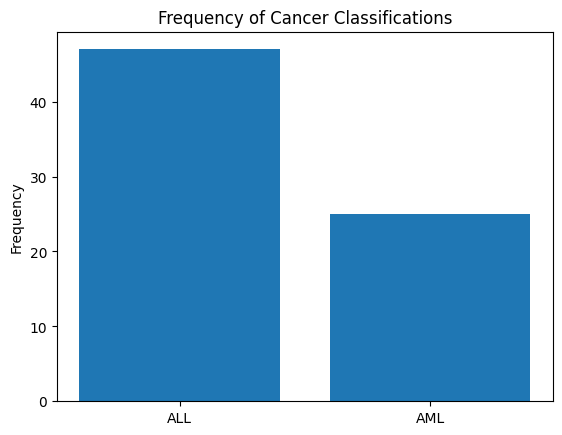

In [ ]:
# Display distribution of ALL vs AML
import matplotlib.pyplot as plt
all_count = sum(y)
aml_count = len(y) - all_count
counts = [all_count, aml_count]
labels = ["ALL", "AML"]

plt.bar(labels, counts)
plt.ylabel("Frequency")
plt.title("Frequency of Cancer Classifications")
# For Top features with the most feature importance, display their boxplots of distributions

# Data Analysis

### Principal Component Analysis and Regression

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pca = PCA()
x_train_reduced = pca.fit_transform(x_train)
pca_errors = {}

pca_errors[0] = 0 - cross_val_score(LinearRegression(),
                                    np.ones((len(x_train_reduced), 1)),
                                    y_train,
                                    scoring="neg_mean_squared_error").mean()

for i in range(1,39):
  score = cross_val_score(LinearRegression(),
                          x_train_reduced[:, :i],
                          y_train,
                          scoring="neg_mean_squared_error").mean()
  pca_errors[i] = 0 - score

pca_df = pd.DataFrame({"M" : pca_errors.keys(),
                       "MSE" : pca_errors.values()})
pca_df.sort_values(by="MSE").reset_index(drop=True)

,M,MSE
0,35,0.041480
1,38,0.045119
2,37,0.045284
3,36,0.046252
4,34,0.058293
5,33,0.060410
6,9,0.081520
7,8,0.087963
8,32,0.088243
9,5,0.096839


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

x_test_reduced = pca.transform(x_test)[:, :35]
pcr = LinearRegression().fit(x_train_reduced[:, :35], y_train)
print("Principal Component Regression\n R^2 Score ",
      r2_score(y_test, pcr.predict(x_test_reduced)),
      "\n MSE: ",
      mean_squared_error(y_test, pcr.predict(x_test_reduced)))

Principal Component Regression
 R^2 Score  0.7284760531622027 
 MSE:  0.06576704594687133


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = logreg.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.93      1.00      0.97        14
        True       1.00      0.95      0.97        20

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



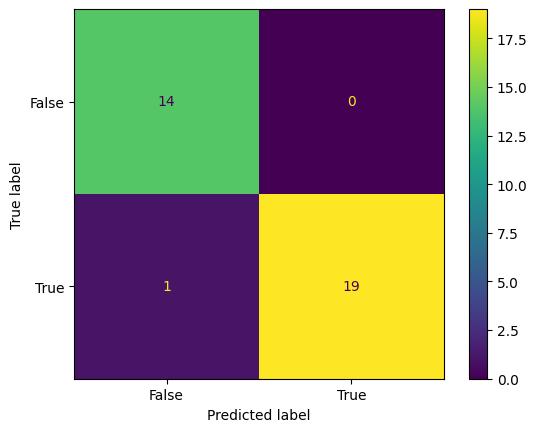

In [ ]:
plt.show(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [False, True]).plot())

### Logistic Regression with dimension reduction by PCA

In [ ]:
logreg = LogisticRegression()
logreg.fit(pd.DataFrame(x_train_reduced[:, :35]), y_train)

LogisticRegression()

In [ ]:
predictions = logreg.predict(pd.DataFrame(x_test_reduced[:, :35]))
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.78      1.00      0.88        14
        True       1.00      0.80      0.89        20

    accuracy                           0.88        34
   macro avg       0.89      0.90      0.88        34
weighted avg       0.91      0.88      0.88        34



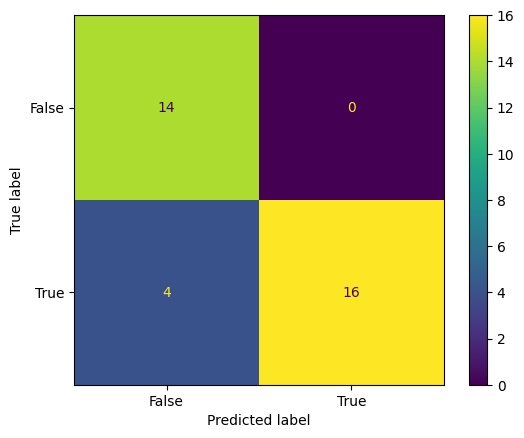

In [ ]:
plt.show(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions), display_labels = [False, True]).plot())

### Random Forest Classifier

In [ ]:
import sklearn.metrics as skmetrics
import sklearn.ensemble as ske
import sklearn.model_selection as skm

In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
rfc.fit(x_train, y_train)
predictions_train = rfc.predict(x_train)
predictions_test = rfc.predict(x_test)
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
best_features = pd.DataFrame({"feature": x_train.columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False)
display(best_features.head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
2287,DF D component of complement (adipsin),0.025586
1119,SNRPN Small nuclear ribonucleoprotein polypept...,0.022712
1806,Neuromedin B mRNA,0.022376
1143,SPTAN1 Spectrin; alpha; non-erythrocytic 1 (al...,0.020000
5038,LEPR Leptin receptor,0.017276
5898,Rhesus (Rh) Blood Group System Ce-Antigen; Alt...,0.016782
234,KIAA0022 gene,0.015921
2885,Transmembrane protein mRNA,0.015440
1845,CTRB1 Chymotrypsinogen B1,0.012494
3257,Phosphotyrosine independent ligand p62 for the...,0.012159


Train error: 0.0
Test error: 0.23529411764705888
Train F1: 1.0
Test F1: 0.8333333333333333
Train AUC: 1.0
Test AUC: 0.7142857142857143


In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
gscv = skm.GridSearchCV(rfc, {"n_estimators":[50, 100, 250, 500,], "min_samples_split":list(range(2,10)), "min_samples_leaf":list(range(2,10))}, scoring = 'f1')
gscv.fit(x_train, y_train)
print("Best parameters: ")
print(gscv.best_params_)
print("Best score: " + str(gscv.best_score_))

Best parameters: 
{'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 100}
Best score: 0.9818181818181818


In [ ]:
rfc = ske.RandomForestClassifier(n_estimators = 100, min_samples_leaf = 2, min_samples_split = 9, random_state = 123)
rfc.fit(x_train, y_train)
predictions_train = rfc.predict(x_train)
predictions_test = rfc.predict(x_test)
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
display(pd.DataFrame({"feature": x_train.columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False).head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
2287,DF D component of complement (adipsin),0.027093
1119,SNRPN Small nuclear ribonucleoprotein polypept...,0.024451
1806,Neuromedin B mRNA,0.020000
1143,SPTAN1 Spectrin; alpha; non-erythrocytic 1 (al...,0.020000
5898,Rhesus (Rh) Blood Group System Ce-Antigen; Alt...,0.018851
234,KIAA0022 gene,0.017618
5038,LEPR Leptin receptor,0.017276
2885,Transmembrane protein mRNA,0.017112
3257,Phosphotyrosine independent ligand p62 for the...,0.013271
1845,CTRB1 Chymotrypsinogen B1,0.011900


Train error: 0.0
Test error: 0.2647058823529411
Train F1: 1.0
Test F1: 0.8163265306122449
Train AUC: 1.0
Test AUC: 0.6785714285714286


In [ ]:
best_features.to_csv("feature_importance.csv")

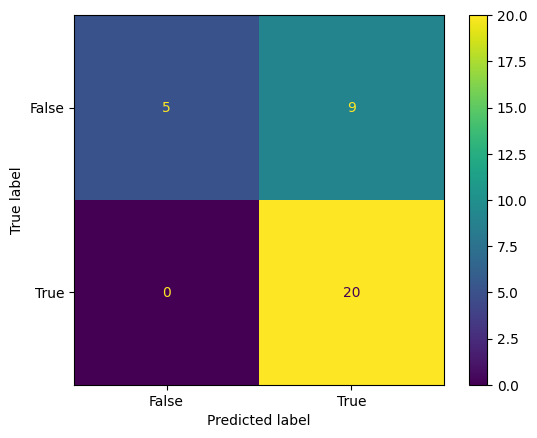

In [ ]:
plt.show(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions_test), display_labels = [False, True]).plot())

### Random Forest Classifier with Reduced Number of Features Using Feature Importances

In [ ]:
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
  x_train_reduced = x_train.drop(best_features.iloc[i:]["feature"], axis = 1)
  x_test_reduced = x_test.drop(best_features.iloc[i:]["feature"], axis = 1)
  rfc = ske.RandomForestClassifier(random_state = 123)
  rfc.fit(x_train_reduced, y_train)
  predictions_train = rfc.predict(x_train_reduced)
  predictions_test = rfc.predict(x_test_reduced)
  train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
  test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
  train_f1 = skmetrics.f1_score(y_train, predictions_train)
  test_f1 = skmetrics.f1_score(y_test, predictions_test)
  train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
  test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
  print("Features: " + str(i) + "\nTrain error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc) + "\n")

Features: 10
Train error: 0.0
Test error: 0.17647058823529416
Train F1: 1.0
Test F1: 0.8695652173913044
Train AUC: 1.0
Test AUC: 0.7857142857142857

Features: 20
Train error: 0.0
Test error: 0.2647058823529411
Train F1: 1.0
Test F1: 0.8085106382978724
Train AUC: 1.0
Test AUC: 0.6892857142857143

Features: 30
Train error: 0.0
Test error: 0.17647058823529416
Train F1: 1.0
Test F1: 0.8695652173913044
Train AUC: 1.0
Test AUC: 0.7857142857142857

Features: 40
Train error: 0.0
Test error: 0.17647058823529416
Train F1: 1.0
Test F1: 0.8695652173913044
Train AUC: 1.0
Test AUC: 0.7857142857142857

Features: 50
Train error: 0.0
Test error: 0.17647058823529416
Train F1: 1.0
Test F1: 0.8695652173913044
Train AUC: 1.0
Test AUC: 0.7857142857142857

Features: 60
Train error: 0.0
Test error: 0.1470588235294118
Train F1: 1.0
Test F1: 0.888888888888889
Train AUC: 1.0
Test AUC: 0.8214285714285714

Features: 70
Train error: 0.0
Test error: 0.1470588235294118
Train F1: 1.0
Test F1: 0.888888888888889
Train A

In [ ]:
# Columns 80 and below were best so choose that set of features as train and test data
x_train_reduced = x_train.drop(best_features.iloc[80:]["feature"], axis = 1)
x_test_reduced = x_test.drop(best_features.iloc[80:]["feature"], axis = 1)

In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
rfc.fit(x_train_reduced, y_train)
predictions_train = rfc.predict(x_train_reduced)
predictions_test = rfc.predict(x_test_reduced)
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))

Train error: 0.0
Test error: 0.11764705882352944
Train F1: 1.0
Test F1: 0.9090909090909091
Train AUC: 1.0
Test AUC: 0.8571428571428572


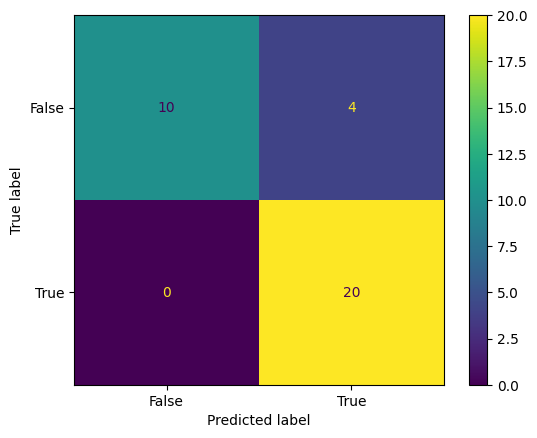

In [ ]:
plt.show(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions_test), display_labels = [False, True]).plot())

### Random Forest Classifier with dimension reduction by PCA

In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
rfc.fit(pd.DataFrame(x_train_reduced[:, :35]), y_train)
predictions_train = rfc.predict(pd.DataFrame(x_train_reduced[:, :35]))
predictions_test = rfc.predict(pd.DataFrame(x_test_reduced[:, :35]))
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
display(pd.DataFrame({"feature": pd.DataFrame(x_train_reduced[:, :35]).columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False).head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
1,1,0.163099
0,0,0.074177
18,18,0.060708
15,15,0.052153
4,4,0.052124
6,6,0.047910
23,23,0.038980
21,21,0.037486
11,11,0.031870
22,22,0.030291


Train error: 0.0
Test error: 0.23529411764705888
Train F1: 1.0
Test F1: 0.8260869565217392
Train AUC: 1.0
Test AUC: 0.725


In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
gscv = skm.GridSearchCV(rfc, {"n_estimators":[50, 100, 250, 500,], "min_samples_split":list(range(2,10)), "min_samples_leaf":list(range(2,10))}, scoring = 'f1')
gscv.fit(pd.DataFrame(x_train_reduced[:, :35]), y_train)
print("Best parameters: ")
print(gscv.best_params_)
print("Best score: " + str(gscv.best_score_))

Best parameters: 
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8432234432234431


In [ ]:
rfc = ske.RandomForestClassifier(n_estimators = 100, min_samples_leaf = 2, min_samples_split = 2, random_state = 123)
rfc.fit(pd.DataFrame(x_train_reduced[:, :35]), y_train)
predictions_train = rfc.predict(pd.DataFrame(x_train_reduced[:, :35]))
predictions_test = rfc.predict(pd.DataFrame(x_test_reduced[:, :35]))
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
display(pd.DataFrame({"feature": pd.DataFrame(x_train_reduced[:, :35]).columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False).head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
1,1,0.180686
0,0,0.082470
6,6,0.057495
4,4,0.055122
18,18,0.052997
15,15,0.051435
21,21,0.041489
23,23,0.029379
11,11,0.028125
2,2,0.025910


Train error: 0.0
Test error: 0.2941176470588235
Train F1: 1.0
Test F1: 0.7916666666666667
Train AUC: 1.0
Test AUC: 0.6535714285714285


### Random Forest Classifier with Selection of Genes indicated by AML and ALL

In [ ]:
feature_importance_specific = pd.read_csv("https://raw.githubusercontent.com/timaeusx/ds4400-gene-expression/main/data/feature_importance_specific.csv")
feature_importance_specific.head(10)

,Unnamed: 0,feature,importance,Unnamed: 3
0,6517,1-PHOSPHATIDYLINOSITOL-4;5-BISPHOSPHATE PHOSPH...,0.0,ALL
1,4782,An acute myeloid leukaemia protein (1793bp),0.0,ALL
2,2562,BCL6 B cell lymphoma protein 6 (zinc finger pr...,0.0,ALL
3,2353,CCND3 Cyclin D3,0.0,ALL
4,5036,CHD5 protein,0.0,ALL
5,4572,DCC Deleted in colorectal carcinoma,0.0,ALL
6,4397,DNMT DNA methyltransferase,0.0,ALL
7,3493,Enhancer of zeste homolog 2 (EZH2) mRNA,0.0,ALL
8,2747,ETV6 Ets variant gene 6 (TEL oncogene),0.0,ALL
9,1589,GB DEF = (clone PEBP2aA1) core-binding factor;...,0.0,ALL


In [ ]:
x_train_reduced = x_train.loc[:,~x_train.columns.duplicated()].filter(feature_importance_specific["feature"], axis = 1)
x_test_reduced = x_test.loc[:,~x_test.columns.duplicated()].filter(feature_importance_specific["feature"], axis = 1)

In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
rfc.fit(x_train_reduced, y_train)
predictions_train = rfc.predict(x_train_reduced)
predictions_test = rfc.predict(x_test_reduced)
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
display(pd.DataFrame({"feature": x_train_reduced.columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False).head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
3,CCND3 Cyclin D3,0.111898
59,RAS-RELATED PROTEIN RAB-1A,0.079190
54,Ras-Like Protein Tc10,0.053655
13,IL7R Interleukin 7 receptor,0.045603
57,Ras-Related C3 Botulinum Toxin Substrate,0.040262
22,Phosphatidylinositol 3-Kinase P110; Beta Isoform,0.040219
36,NFIX Nuclear factor I/X (CCAAT-binding transcr...,0.037633
16,PHOSPHATIDYLINOSITOL,0.029066
69,Transcription factor (CBFB) mRNA; 3' end,0.028265
30,Cbl-b mRNA,0.026413


Train error: 0.0
Test error: 0.20588235294117652
Train F1: 1.0
Test F1: 0.851063829787234
Train AUC: 1.0
Test AUC: 0.75


In [ ]:
rfc = ske.RandomForestClassifier(random_state = 123)
gscv = skm.GridSearchCV(rfc, {"n_estimators":[50, 100, 250, 500,], "min_samples_split":list(range(2,10)), "min_samples_leaf":list(range(2,10))}, scoring = 'f1')
gscv.fit(x_train_reduced, y_train)
print("Best parameters: ")
print(gscv.best_params_)
print("Best score: " + str(gscv.best_score_))

Best parameters: 
{'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 500}
Best score: 0.9177156177156178


In [ ]:
rfc = ske.RandomForestClassifier(n_estimators = 500, min_samples_leaf = 4, min_samples_split = 2, random_state = 123)
rfc.fit(x_train_reduced, y_train)
predictions_train = rfc.predict(x_train_reduced)
predictions_test = rfc.predict(x_test_reduced)
train_error = 1 - skmetrics.accuracy_score(y_train, predictions_train)
test_error = 1 - skmetrics.accuracy_score(y_test, predictions_test)
train_f1 = skmetrics.f1_score(y_train, predictions_train)
test_f1 = skmetrics.f1_score(y_test, predictions_test)
train_auc = skmetrics.roc_auc_score(y_train, predictions_train)
test_auc = skmetrics.roc_auc_score(y_test, predictions_test)
print("\nFeature Importance")
display(pd.DataFrame({"feature": x_train_reduced.columns, "importance": rfc.feature_importances_,}).sort_values("importance", ascending = False).head(10))
print("Train error: " + str(train_error) + "\nTest error: " + str(test_error) + "\nTrain F1: " +  str(train_f1) + "\nTest F1: " + str(test_f1) + "\nTrain AUC: " + str(train_auc) + "\nTest AUC: " + str(test_auc))


Feature Importance


,feature,importance
3,CCND3 Cyclin D3,0.126508
59,RAS-RELATED PROTEIN RAB-1A,0.072876
13,IL7R Interleukin 7 receptor,0.069974
54,Ras-Like Protein Tc10,0.053789
22,Phosphatidylinositol 3-Kinase P110; Beta Isoform,0.047840
57,Ras-Related C3 Botulinum Toxin Substrate,0.045934
36,NFIX Nuclear factor I/X (CCAAT-binding transcr...,0.034374
68,Receptor of retinoic acid,0.028037
69,Transcription factor (CBFB) mRNA; 3' end,0.027613
46,Ras GTPase-activating-like protein (IQGAP1) mRNA,0.025481


Train error: 0.0
Test error: 0.2647058823529411
Train F1: 1.0
Test F1: 0.8163265306122449
Train AUC: 1.0
Test AUC: 0.6785714285714286


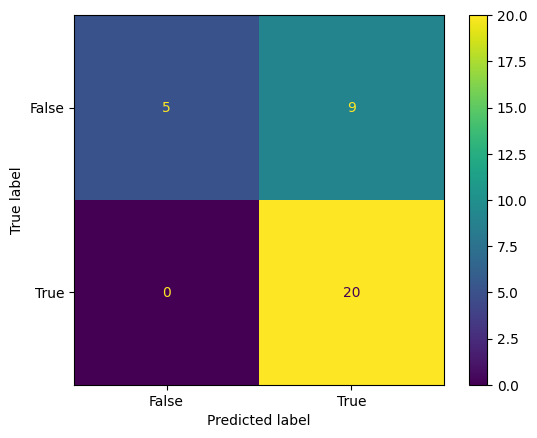

In [ ]:
plt.show(ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions_test), display_labels = [False, True]).plot())

### K-Nearest Neighbors

Use Gridsearch to find the best parameters for the KNeighborsClassifier. In this case, the best n_neighbors = 4.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 4}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 97.50%


Use the best parameters to train a KNeighbors Classifier and calculate test accuracy for the model.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

knn.fit(x_train, y_train)

y_test_hat=knn.predict(x_test)

test_accuracy = skmetrics.accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 88.24%


### Neural Network

In [ ]:
# Process data into tensors

import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
import numpy as np

batch_size = 8

train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train.values.astype(float), dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True, num_workers=True)

x_te = torch.tensor(x_test.values.astype(float), dtype=torch.float32)
y_te = torch.tensor(y_test, dtype=torch.float32)

n_train, p = x_train.shape
n_test, p = x_te.shape

In [ ]:
# Build the network!

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(7129, 128)
    self.act1 = nn.ReLU()
    self.output = nn.Linear(128, 2)
    self.act2=nn.LogSoftmax(dim=1)

  def forward(self, x):
    x = self.act1(self.hidden(x))
    x = self.act2(self.output(x))
    return x

In [ ]:
def train_one_epoch(train_loader, model, optimizer, epoch):
    model.train()
    train_loss = 0
    num_correct = 0
    
    for i, (feature, label) in enumerate(train_loader):

        # ------------------
        
        output = model(feature)
        loss = nn.functional.nll_loss(output, label.long(), reduction = 'mean')
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        pred = output.argmax(dim=1, keepdim=True) # Get index of largest log-probability and use that as prediction
        num_correct += (pred == label.view_as(pred)).sum().item()
        train_loss += loss.item()
      
    return train_loss, num_correct

In [ ]:
def test_one_epoch(X_test, Y_test, model):
    model.eval()
    test_loss = 0
    num_correct = 0
    
    with torch.no_grad():
        feature = X_test
        label = Y_test

        output = model(feature)
        pred = output.argmax(dim=1, keepdim=True)
        num_correct += (pred == label.view_as(pred)).sum().item()
        test_loss += nn.functional.nll_loss(output, label.long(), reduction = 'mean')

    return test_loss, num_correct

In [ ]:
# Hyperparameters
lr = 0.001
max_epochs=50
wd = 0.02

model = Network()

# Instantiate optimizer (model was created in previous cell)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay = wd)

train_losses = []
train_correct_list = []
test_losses = []
test_correct_list = []
train_accuracy_list = []
test_accuracy_list = []

for epoch in tqdm.trange(max_epochs, leave=True, desc='Epochs'):
    train_loss, train_correct = train_one_epoch(train_loader, model, optimizer, epoch)
    test_loss, test_correct = test_one_epoch(x_te, y_te, model)

    # Record results
    train_losses.append(train_loss)
    train_correct_list.append(train_correct)
    test_losses.append(test_loss)
    test_correct_list.append(test_correct)
    train_accuracy = train_correct / n_train
    test_accuracy = test_correct / n_test
    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)

    print('\nloss', train_loss / n_train, float(test_loss) / n_test)
    print('accuracy', train_accuracy, test_accuracy, '\n')



print('highest test accuracy: ' + str(max(test_accuracy_list)))
index = test_accuracy_list.index(max(test_accuracy_list))
print('corresponding epoch: ' + str(list(range(1, max_epochs + 1))[index]))

Epochs:   2%|▏         | 1/50 [00:00<00:10,  4.74it/s]


loss 99459.61474378486 0.08218994561363668
accuracy 0.5 0.29411764705882354 



Epochs:   4%|▍         | 2/50 [00:00<00:07,  6.42it/s]


loss 1.3800791345144574 0.037879719453699445
accuracy 0.5526315789473685 0.38235294117647056 



Epochs:   6%|▌         | 3/50 [00:00<00:06,  7.29it/s]


loss 1.0479535460472107 0.03828876158770393
accuracy 0.3684210526315789 0.35294117647058826 



Epochs:   8%|▊         | 4/50 [00:00<00:06,  7.39it/s]


loss 0.09283337938158136 0.038278993438271916
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  10%|█         | 5/50 [00:00<00:06,  7.31it/s]


loss 0.09276347254451953 0.038269102573394775
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  12%|█▏        | 6/50 [00:00<00:05,  7.65it/s]


loss 0.0925827277334113 0.03825982177958769
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  14%|█▍        | 7/50 [00:00<00:05,  7.86it/s]


loss 0.09252239528455232 0.03825052345500273
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  16%|█▌        | 8/50 [00:01<00:05,  8.10it/s]


loss 0.09256424872498763 0.03824096216874964
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  18%|█▊        | 9/50 [00:01<00:05,  8.12it/s]


loss 0.09244615780679803 0.038231485030230355
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  20%|██        | 10/50 [00:01<00:05,  7.69it/s]


loss 0.0924299955368042 0.038222021916333365
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  22%|██▏       | 11/50 [00:01<00:04,  7.80it/s]


loss 0.09232079041631598 0.0382126674932592
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  24%|██▍       | 12/50 [00:01<00:04,  8.32it/s]


loss 0.0922954537366566 0.03820330255171832
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  26%|██▌       | 13/50 [00:01<00:04,  8.72it/s]


loss 0.09223154971474096 0.038193920079399556
accuracy 0.2894736842105263 0.35294117647058826 


loss 0.09216142328161943 0.03818462876712575
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  30%|███       | 15/50 [00:01<00:03,  9.41it/s]


loss 0.09206499865180567 0.038175477701074934
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  32%|███▏      | 16/50 [00:01<00:03,  9.52it/s]


loss 0.09203284665157921 0.0381662459934459
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  34%|███▍      | 17/50 [00:02<00:03,  9.55it/s]


loss 0.09196949789398595 0.03815705285352819
accuracy 0.2894736842105263 0.35294117647058826 


loss 0.09190067805741962 0.038147870232077205
accuracy 0.2894736842105263 0.35294117647058826 


loss

Epochs:  38%|███▊      | 19/50 [00:02<00:03,  9.62it/s]

 0.09179317637493736 0.0381393362494076
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  40%|████      | 20/50 [00:02<00:03,  9.55it/s]


loss 0.09177552398882415 0.03813021673875697
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  42%|████▏     | 21/50 [00:02<00:03,  9.07it/s]


loss 0.0917118019179294 0.03812117436352898
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  44%|████▍     | 22/50 [00:02<00:03,  8.81it/s]


loss 0.09163203835487366 0.03811240546843585
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  46%|████▌     | 23/50 [00:02<00:03,  8.55it/s]


loss 0.09158450678775185 0.03810348580865299
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  48%|████▊     | 24/50 [00:02<00:03,  8.38it/s]


loss 0.09152256658202723 0.038094692370470834
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  50%|█████     | 25/50 [00:03<00:03,  8.23it/s]


loss 0.09144299124416552 0.03808614085702335
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  52%|█████▏    | 26/50 [00:03<00:02,  8.27it/s]


loss 0.0913933233210915 0.03807766297284294
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  54%|█████▍    | 27/50 [00:03<00:02,  7.99it/s]


loss 0.09133201053268031 0.03806924118715174
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  56%|█████▌    | 28/50 [00:03<00:02,  7.67it/s]


loss 0.09128166970453765 0.03806077732759364
accuracy 0.2894736842105263 0.35294117647058826 



Epochs:  58%|█████▊    | 29/50 [00:03<00:02,  7.99it/s]


loss 0.09122867176407262 0.03805180156932158
accuracy 0.23684210526315788 0.5588235294117647 



Epochs:  60%|██████    | 30/50 [00:03<00:02,  8.42it/s]


loss 0.09116103774622868 0.03804350600523107
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  62%|██████▏   | 31/50 [00:04<00:03,  4.86it/s]


loss 0.0911030816404443 0.03803498254102819
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  64%|██████▍   | 32/50 [00:04<00:04,  3.87it/s]


loss 0.09105539165045086 0.03802681319853839
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  66%|██████▌   | 33/50 [00:04<00:05,  3.14it/s]


loss 0.09101378290276778 0.03801890331156114
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  68%|██████▊   | 34/50 [00:05<00:05,  2.99it/s]


loss 0.09093166809332998 0.03801043945200303
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  70%|███████   | 35/50 [00:05<00:05,  2.76it/s]


loss 0.09086897655537254 0.03800205974017873
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  72%|███████▏  | 36/50 [00:06<00:05,  2.44it/s]


loss 0.09084360536776091 0.037994079730089975
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  74%|███████▍  | 37/50 [00:06<00:05,  2.20it/s]


loss 0.09073757654742191 0.03798559132744284
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  76%|███████▌  | 38/50 [00:07<00:05,  2.11it/s]


loss 0.09071278258373863 0.03797747457728667
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  78%|███████▊  | 39/50 [00:07<00:04,  2.27it/s]


loss 0.09065995247740495 0.037969522616442514
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  80%|████████  | 40/50 [00:08<00:05,  1.98it/s]


loss 0.09058014342659398 0.037961346261641556
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  82%|████████▏ | 41/50 [00:08<00:05,  1.77it/s]


loss 0.09049432528646369 0.03795306822832893
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  84%|████████▍ | 42/50 [00:09<00:04,  1.85it/s]


loss 0.09043229253668535 0.03794472708421595
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  86%|████████▌ | 43/50 [00:09<00:03,  1.90it/s]


loss 0.09046619346267298 0.03793703107272878
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  88%|████████▊ | 44/50 [00:10<00:03,  1.94it/s]


loss 0.09031390830090172 0.03792884770561667
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  90%|█████████ | 45/50 [00:10<00:02,  1.96it/s]


loss 0.09040175143041108 0.03792137258193072
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  92%|█████████▏| 46/50 [00:11<00:02,  1.82it/s]


loss 0.09027683734893799 0.03791360294117647
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  94%|█████████▍| 47/50 [00:11<00:01,  2.00it/s]


loss 0.09022375627567894 0.037905808757333195
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  96%|█████████▌| 48/50 [00:12<00:00,  2.23it/s]


loss 0.09012906802328009 0.037897961981156296
accuracy 0.7105263157894737 0.5588235294117647 



Epochs:  98%|█████████▊| 49/50 [00:12<00:00,  2.39it/s]


loss 0.09016422221535131 0.03789042024051442
accuracy 0.7105263157894737 0.5588235294117647 



Epochs: 100%|██████████| 50/50 [00:12<00:00,  3.86it/s]


loss 0.09002240080582469 0.03788272072287167
accuracy 0.7105263157894737 0.5588235294117647 

highest test accuracy: 0.5588235294117647
corresponding epoch: 29


<function matplotlib.pyplot.show(close=None, block=None)>

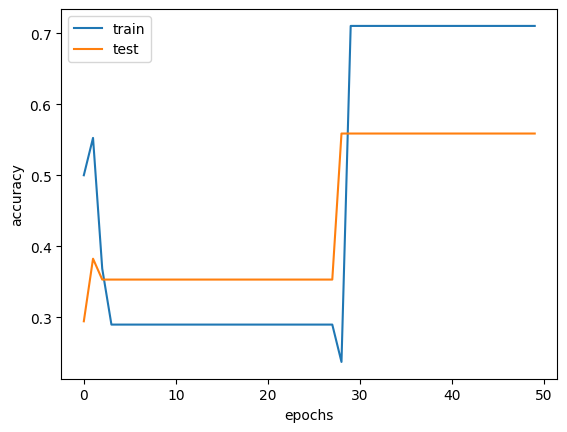

In [ ]:
# Plot accuraccy
plt.plot(train_accuracy_list, label="train")
plt.plot(test_accuracy_list, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show